# 1. Load the data

Hypothesis: cats adopt faster than dogs

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv('datasett/meow_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14963 non-null  int64  
 1   PetID              14963 non-null  object 
 2   Type               14963 non-null  object 
 3   Name               14963 non-null  object 
 4   Age                14963 non-null  int64  
 5   Breed1             14963 non-null  object 
 6   Breed2             14963 non-null  object 
 7   Gender             14963 non-null  object 
 8   Color1             14963 non-null  object 
 9   Color2             14963 non-null  object 
 10  Color3             14963 non-null  object 
 11  MaturitySize       14963 non-null  object 
 12  FurLength          14963 non-null  object 
 13  Vaccinated         13099 non-null  object 
 14  Dewormed           13186 non-null  object 
 15  Sterilized         13155 non-null  object 
 16  Health             149

In [195]:
df.head()

,Unnamed: 0,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,Dewormed,Sterilized,Health,State,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,AdoptionSpeedBool
0,0,86e1089a3,Cat,Nibble,3,Tabby,Tabby,Male,Black,White,...,No,No,Healthy,Selangor,1,100,0,1.0,2,Fast
1,1,6296e909a,Cat,No Name Yet,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,...,NaN,NaN,Healthy,Kuala Lumpur,1,0,0,2.0,0,Fast
2,2,3422e4906,Dog,Brisco,1,Mixed Breed,Mixed Breed,Male,Brown,White,...,Yes,No,Healthy,Selangor,1,0,0,7.0,3,Slow
3,3,5842f1ff5,Dog,Miko,4,Mixed Breed,Mixed Breed,Female,Black,Brown,...,Yes,No,Healthy,Kuala Lumpur,1,150,0,8.0,2,Fast
4,4,850a43f90,Dog,Hunter,1,Mixed Breed,Mixed Breed,Male,Black,Black,...,No,No,Healthy,Selangor,1,0,0,3.0,2,Fast


# 2. EDA

In [196]:
df = df.drop(["Unnamed: 0", "PetID", "Name", "VideoAmt", "PhotoAmt"], axis=1)
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed,AdoptionSpeedBool
0,Cat,3,Tabby,Tabby,Male,Black,White,White,Small,Short,No,No,No,Healthy,Selangor,1,100,2,Fast
1,Cat,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,Brown,Medium,Medium,NaN,NaN,NaN,Healthy,Kuala Lumpur,1,0,0,Fast
2,Dog,1,Mixed Breed,Mixed Breed,Male,Brown,White,White,Medium,Medium,Yes,Yes,No,Healthy,Selangor,1,0,3,Slow
3,Dog,4,Mixed Breed,Mixed Breed,Female,Black,Brown,Brown,Medium,Short,Yes,Yes,No,Healthy,Kuala Lumpur,1,150,2,Fast
4,Dog,1,Mixed Breed,Mixed Breed,Male,Black,Black,Black,Medium,Short,No,No,No,Healthy,Selangor,1,0,2,Fast


In [197]:
print(df.isnull().sum())


Type                    0
Age                     0
Breed1                  0
Breed2                  0
Gender                  0
Color1                  0
Color2                  0
Color3                  0
MaturitySize            0
FurLength               0
Vaccinated           1864
Dewormed             1777
Sterilized           1808
Health                  0
State                   0
Quantity                0
Fee                     0
AdoptionSpeed           0
AdoptionSpeedBool       0
dtype: int64


### Removing null

In [198]:
print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

['No' nan 'Yes']
['No' nan 'Yes']
['No' nan 'Yes']


In [199]:
df["Vaccinated"] = df["Vaccinated"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Dewormed"] = df["Dewormed"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Sterilized"] = df["Sterilized"].map({"No": 0, np.nan: 0, "Yes": 1})

print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

[0 1]
[0 1]
[0 1]


### Object to ints

In [200]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': ['Cat' 'Dog']
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': ['Tabby' 'Domestic Medium Hair' 'Mixed Breed' 'Domestic Short Hair'
 'Domestic Long Hair' 'Terrier' 'Persian' 'Rottweiler' 'Shih Tzu'
 'Siamese' 'Jack Russell Terrier' 'American Shorthair' 'Spitz'
 'Labrador Retriever' 'Pit Bull Terrier' 'Silky Terrier' 'Bombay' 'Husky'
 'Schnauzer' 'Golden Retriever' 'Siberian Husky' 'Collie'
 'German Shepherd Dog' 'Tortoiseshell' 'Doberman Pinscher' 'Calico'
 'American Staffordshire Terrie

In [201]:
breed_map = {i: v for i, v in enumerate(set(df["Breed1"].unique()).union(set(df["Breed2"].unique())))}
color_map = {i: v for i, v in enumerate(set(df["Color1"].unique()).union(set(df["Color2"].unique())).union(set(df["Color3"].unique())))}
state_map = {i: v for i, v in enumerate(set(df["State"].unique()))}

type_map = {0: 'Cat', 1: 'Dog'}
gender_map = {0: 'Male', 1: 'Female', 2: 'Mixed'}
size_map = {0: 'Small', 1: 'Medium', 2: 'Large', 3: 'Extra Large'}
length_map = {0: 'Short', 1: 'Medium', 2: 'Long'}
health_map = {0: 'Healthy', 1: 'Minor Injury', 2: 'Serious Injury'}
speed_map = {0: 'Slow', 1: 'Fast'}

df["Breed1"] = df["Breed1"].map({v: k for k, v in breed_map.items()})
df["Breed2"] = df["Breed2"].map({v: k for k, v in breed_map.items()})
df["Color1"] = df["Color1"].map({v: k for k, v in color_map.items()})
df["Color2"] = df["Color2"].map({v: k for k, v in color_map.items()})
df["Color3"] = df["Color3"].map({v: k for k, v in color_map.items()})
df["State"] = df["State"].map({v: k for k, v in state_map.items()})

df["Type"] = df["Type"].map({v: k for k, v in type_map.items()})
df["Gender"] = df["Gender"].map({v: k for k, v in gender_map.items()})
df["MaturitySize"] = df["MaturitySize"].map({v: k for k, v in size_map.items()})
df["FurLength"] = df["FurLength"].map({v: k for k, v in length_map.items()})
df["Health"] = df["Health"].map({v: k for k, v in health_map.items()})
df["AdoptionSpeedBool"] = df["AdoptionSpeedBool"].map({v: k for k, v in speed_map.items()})

In [202]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': [0 1]
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': [185  30  33 176 146 104 109 152  40 167 169 124  82  43 105  21 116 138
 134  29  75  39 173 129  73  13 132   4 106   6  11 157  17 172 107  89
 163  64 160 119  97 112  24  47  54  92 128  22  32   3  76  68 130 140
 117 110  86 150 182 135  23  28  79  41 151 111  31   1  55 101  90 149
  45  70 165  71  18  85 171 126  98  14  74  96  10 181  62 143  27  67
  53  42 179  59  80 144   8 123  87  57  36 154  48 177  12 164 103 12

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Type               14963 non-null  int64
 1   Age                14963 non-null  int64
 2   Breed1             14963 non-null  int64
 3   Breed2             14963 non-null  int64
 4   Gender             14963 non-null  int64
 5   Color1             14963 non-null  int64
 6   Color2             14963 non-null  int64
 7   Color3             14963 non-null  int64
 8   MaturitySize       14963 non-null  int64
 9   FurLength          14963 non-null  int64
 10  Vaccinated         14963 non-null  int64
 11  Dewormed           14963 non-null  int64
 12  Sterilized         14963 non-null  int64
 13  Health             14963 non-null  int64
 14  State              14963 non-null  int64
 15  Quantity           14963 non-null  int64
 16  Fee                14963 non-null  int64
 17  AdoptionSpee

In [204]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed,AdoptionSpeedBool
0,0,3,185,185,0,1,4,4,0,0,0,0,0,0,12,1,100,2,1
1,0,1,30,30,0,1,0,0,1,1,0,0,0,0,5,1,0,0,1
2,1,1,33,33,0,0,4,4,1,1,1,1,0,0,12,1,0,3,0
3,1,4,33,33,1,1,0,0,1,0,1,1,0,0,5,1,150,2,1
4,1,1,33,33,0,1,1,1,1,0,0,0,0,0,12,1,0,2,1


### Remove Outliers

<Axes: >

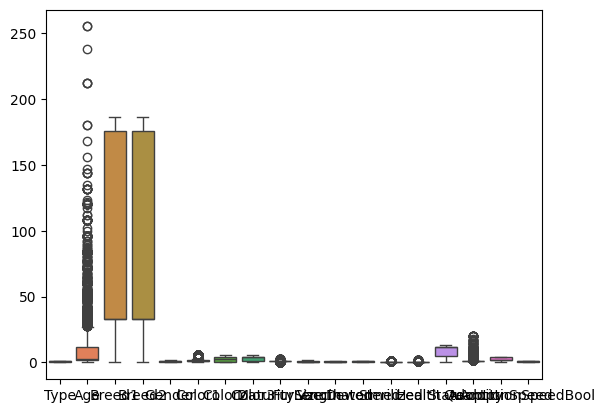

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df.drop(["Fee"], axis=1))

C:\Users\user\AppData\Local\Temp\ipykernel_52368\766646505.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fee'].fillna(df['Fee'].mean(), inplace=True)


<Axes: >

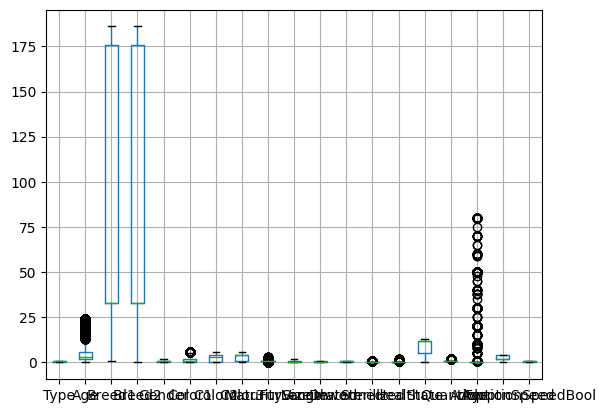

In [206]:
from scipy import stats
df=df[(np.abs(stats.zscore(df['Age'])) < 0.75)]
df=df[(np.abs(stats.zscore(df['Quantity'])) < 0.75)]
df['Fee'].fillna(df['Fee'].mean(), inplace=True)
df=df[(np.abs(stats.zscore(df['Fee'])) < 0.75)]
df.boxplot()

### Trying to find relationships

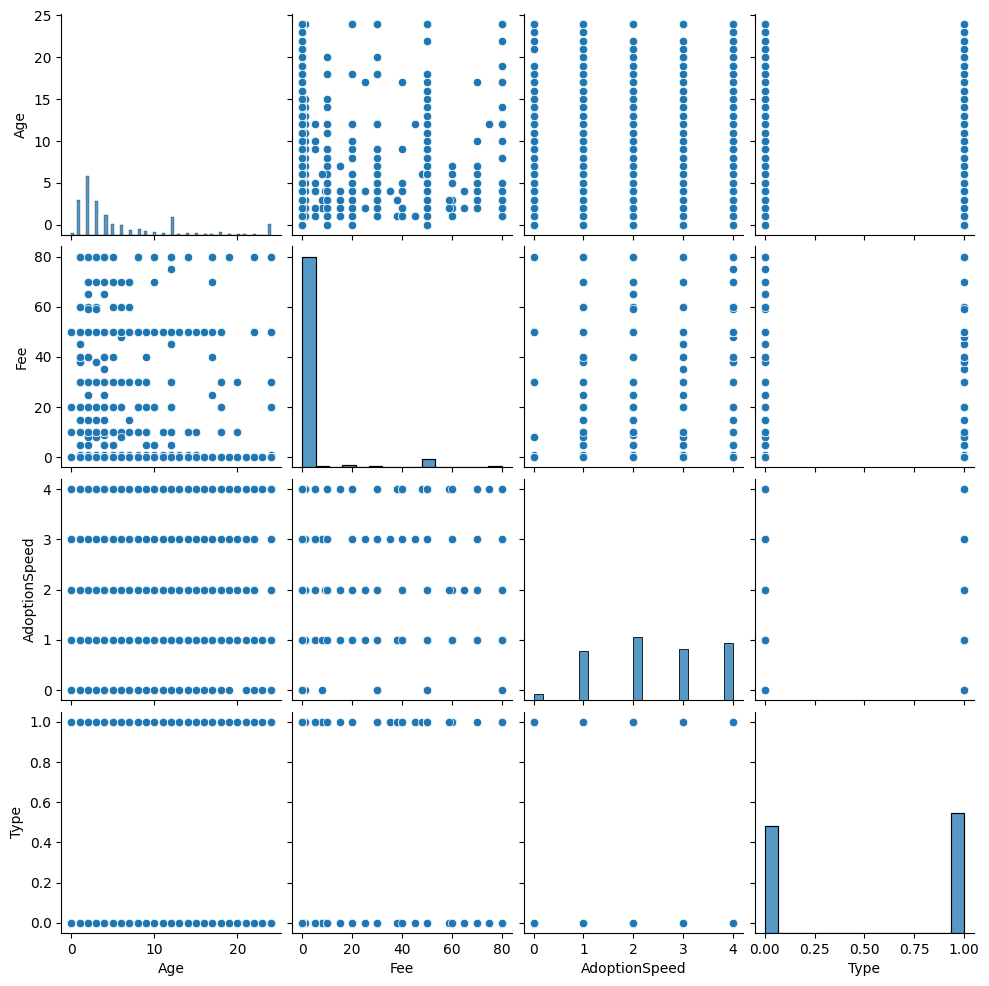

In [207]:


# Select only the chosen numerical columns
selected_columns = ['Age', 'Fee', 'AdoptionSpeed', 'Type']

# Create pair plot
sns.pairplot(df[selected_columns])
plt.show()

# 3. Preprocessing for xgboost

In [208]:
# frequency encoding
frequency_map = df['State'].value_counts().to_dict()
df['State'] = df['State'].map(frequency_map)

# one hot encoding
df = pd.get_dummies(df, columns=['Color1', 'Color2', 'Color3', 'State'], drop_first=True)

# remove cheating variables, breed, age and fee can give away the animal type directly
df = df.drop(["Breed1", "Breed2", "Age", "Fee"], axis=1)
df.head()

,Type,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,AdoptionSpeed,...,State_18,State_53,State_85,State_99,State_162,State_306,State_319,State_610,State_2694,State_6124
1,0,0,1,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
2,1,0,1,1,1,1,0,0,1,3,...,False,False,False,False,False,False,False,False,False,True
4,1,0,1,0,0,0,0,0,1,2,...,False,False,False,False,False,False,False,False,False,True
5,0,1,1,0,0,0,0,0,1,2,...,False,False,False,False,False,False,False,False,False,True
8,0,1,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,True


# 4. Train Model

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [210]:
# Step 1: Separate features and target
X = df.drop('Type', axis=1)  # Features
y = df['Type']               # Target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=10,             # Maximum tree depth
    random_state=42,         # Reproducibility
)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7711703139866793
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       990
           1       0.76      0.82      0.79      1112

    accuracy                           0.77      2102
   macro avg       0.77      0.77      0.77      2102
weighted avg       0.77      0.77      0.77      2102



# 5. Analysing factor that contributes to predictions

<Figure size 1000x800 with 0 Axes>

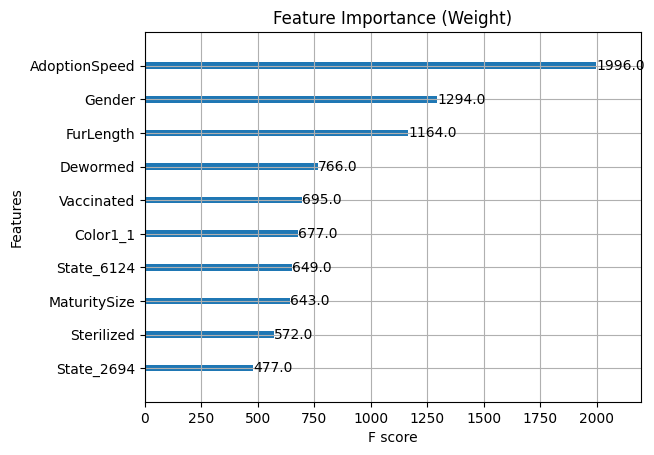

Top 10 important features:
AdoptionSpeed: 1996.0
Gender: 1294.0
FurLength: 1164.0
Dewormed: 766.0
Vaccinated: 695.0
Color1_1: 677.0
State_6124: 649.0
MaturitySize: 643.0
Sterilized: 572.0
State_2694: 477.0


In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Plot the feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance (Weight)')
plt.show()

# Step 7: Display feature importance values directly
# Get feature importance values using 'get_booster' method
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Sort by importance value
importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Display top 10 important features
print("Top 10 important features:")
for feature, score in importance_sorted[:10]:
    print(f"{feature}: {score}")


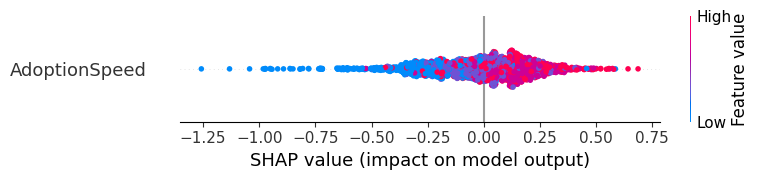

In [213]:
import shap

# Initialize SHAP explainer for the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Get the index of the 'AdoptionSpeed' feature
feature_index = X.columns.get_loc('AdoptionSpeed')

# Visualize SHAP values for 'AdoptionSpeed' feature
shap.summary_plot(shap_values[:, feature_index:feature_index+1], X_test.iloc[:, feature_index:feature_index+1], feature_names=['AdoptionSpeed'])


# 5. Conclusion

The Feature importance bar chart has shown that Adoption speed is the primary factor driving the model's prediction.

By furthur analysing, the SHAP summary plot shows that lower adoption time pushes the prediction to zero (cat), whereas higher adoption time pushes the prediction to one (dog).

The hypothesis of cats adopting faster than dogs seems to be true.

However, the relationship observed may be influenced by various factors such as bias in data. Therefore, while the model suggests a relationship between adoption speed and animal type, further investigation may be needed to draw a valid conclusion.